## Mini syrinx model 

For the annealing hypothesis, we would like to test it using a non-random reward contour.
For this, we attempt to generate a reward contour using a syrinx model used by Darshan, Amador, etc.
https://doi.org/10.1038/nature11967

Here, we provide two vectors, pressure and tension, as input.
The model comprises two odes, which produces the labial position x(t) and velocity y(t).

We transform this to generate song, and see the frequency distribution.

From this frequency distribution, we build the reward contour.

In [1]:
import numpy as np
import matplotlib.pyplot as plt         
import queue

In [2]:
from scipy.integrate import solve_ivp

In [3]:
np.random.seed(100)

In [4]:
# Parameters
gamma = 12000 

duration = 0.050 #s
dt = 1/44100 #s  #* 0.1 #1.e-4

Amp = 10

# Trachea parameters
r=-0.9
v=350*100
L=1.9
tau_0=2*L/v # Propagation time along trachea
tau_n=int(tau_0/dt)

In [5]:
# ks = np.linspace(0.16,0.52, 10)
# ps = np.linspace(1852,2084, 10)

# Track position and velocity 
nt = int(duration/dt)
X = np.zeros(nt)          # Labial position
Y = np.zeros(nt)          # Velocity

Building the tension and pressure vectors for input


In [6]:
def sigmoid(x):
      return 1 / (1 + np.exp(-x))

In [7]:
syllable = 4

In [8]:
def syrinxODE(t, y):
    ''' ODEs used in Amador paper'''
    
    y0, y1 = y
    dydt = [y1,
         -Pressure(t)*(gamma**2) - Tension(t)*(gamma**2)*y0 - (gamma**2)*(y0**3) - gamma*(y0**2)*y1 + (gamma**2)*(y0**2) - gamma*y0*y1
           ]
    return dydt

In [9]:
# RC4
# syllable 1
syllable_array = [1,2,3,4]
P_t_list = []  # <— add before the syllable loop




for syllable in syllable_array:
    if syllable == 1:
        def Tension(t):
            """ Generalised exponential waveform """
            return   .3 - .2*np.exp(-200*t) -.00001 * np.exp(200*t) 

        
        def Pressure(t):
            """ Constant """
            return 0.04*np.sin((duration/2 + t)*np.pi*10) + 0.05
    # RC5 - test
    elif syllable == 2:
        # syllable 2
        def Tension(t):
            """ Generalised exponential waveform """
            Tc = 1#2/3
            return   .3 - .2*np.exp(-Tc*3*100*t) -.00001 * np.exp(Tc*3*100*t) 

        def Pressure(t):
            """ Constant """
            tp = 0.2
            return tp*np.sin((duration/2 + t)*np.pi*10) + 0.05
    elif syllable == 3:
        # syllable 3
        def Tension(t):
            """
                Tension1 = 0.1*np.sin(sin_t*np.pi*40) + 0.6
                Tension2 = 0.2*np.sin(sin_t*np.pi*15) + 0.6
                Tension = np.concatenate((Tension1[:int(np.ceil(nt/2))], Tension2[:int(nt-nt/2)]))
            """
            scale = 1
            if isinstance(t, float):
                if t <= duration*scale/2: 
                    return 5*np.sin(t*np.pi*40/scale) + 0.6 # old amp 0.1
                elif t <= duration*scale: 
                    return 10*np.sin((t-duration*scale/2)*np.pi*15/scale) + 0.6 # old amp 0.2
                else: 
                    return 0.0 + 0*t
            elif isinstance(t, np.ndarray):
                Tension1 = 5*np.sin(t*np.pi*40/scale) + 0.6 # old amp 0.1
                Tension2 = 10*np.sin(t*np.pi*15/scale) + 0.6 # old amp 0.2
                Tension3 = 0.0 + 0*t
                return np.concatenate((Tension1[:int(np.ceil(t.size*scale/2))], Tension2[:int(t.size*scale-t.size*scale/2)], Tension3[:int(t.size-t.size*scale)]))        
        
        def Pressure(t):
            """ Pressure = 0.02 * np.ones((nt)) """
            return np.ones((np.asarray(t).shape)) * 2 # old amp 0.16
    elif syllable == 4:
        # syllable 4
        def Tension(t):
            """
                Tension1 = 0.1*np.sin(sin_t*np.pi*40) + 0.6
                Tension2 = 0.2*np.sin(sin_t*np.pi*15) + 0.6
                Tension = np.concatenate((Tension1[:int(np.ceil(nt/2))], Tension2[:int(nt-nt/2)]))
            """
            scale = 0.4
            if isinstance(t, float):
                if t <= duration*scale: 
                    return 0.8*np.sin(t*np.pi*20/scale) + 0.6 # old amp 0.1
                else: 
                    return t*0 + 0.6 # old amp 0.2
            elif isinstance(t, np.ndarray):
                Tension1 = 0.8*np.sin(t*np.pi*20/scale) + 0.6 # old amp 0.1
                Tension2 = t* 0 + 0.6 # old amp 0.2
                return np.concatenate((Tension1[:int(np.ceil(t.size*scale))], Tension2[:int(t.size-t.size*scale)]))
            
        def Pressure(t):
            """ Pressure = 0.02 * np.ones((nt)) """
            return np.ones((np.asarray(t).shape)) * 0.01
            
    elif syllable == 5:
        # syllable 5
        def Tension(t):
            """ Tension = 0.2 * np.ones((nt)) """
            return np.ones((np.asarray(t).shape)) * 0.2
            
        def Pressure(t):
            """ Pressure = 0.1 * np.ones((nt)) """
            return np.ones((np.asarray(t).shape)) * 0.1
    elif syllable == 6:
        # syllable 6
        def Tension(t):
            """
                Tension1 = 0.1*np.sin(sin_t*np.pi*40) + 0.6
                Tension2 = 0.2*np.sin(sin_t*np.pi*15) + 0.6
                Tension = np.concatenate((Tension1[:int(np.ceil(nt/2))], Tension2[:int(nt-nt/2)]))
            """
            if isinstance(t, float):
                if t <= duration/2: return 0.1*np.sin(t*np.pi*40) + 0.6
                else: return 0.2*np.sin((t-duration/2)*np.pi*15) + 0.6
            elif isinstance(t, np.ndarray):
                Tension1 = 0.1*np.sin(t*np.pi*40) + 0.6
                Tension2 = 0.2*np.sin(t*np.pi*15) + 0.6
                return np.concatenate((Tension1[:int(np.ceil(t.size/2))], Tension2[:int(t.size-t.size/2)]))
            
        def Pressure(t):
            """ Pressure = 0.01*np.sin(sin_t*np.pi*2*100) + 0.02 """
            return 0.01*np.sin(t*np.pi*2*100) + 0.02
        

    solution = solve_ivp(syrinxODE, [0, duration], [1, 1], method = "RK45", t_eval = np.linspace(0,duration,nt), rtol = 1e-8, atol = 1e-8)
    # Extract labial position (X) and velocity (Y)
    X = solution['y'][0]
    Y = solution['y'][1]
    # Transform into song
    time_x = np.linspace(0, duration, nt)
    song = Amp * Pressure(time_x) * Y
    ## Trachea from Darshan, et. al. https://doi.org/10.1038/ncomms15415

    # Input to trachea = output of syrinx
    y0 = song.T

    # To generate pressure output from trachea
    P_i=np.zeros((len(y0)))

    # See Fig 1 in Amador paper. Round-about way to implement that.
    Buffer = queue.Queue()
    for i in np.arange(tau_n):
        Buffer.put(np.random.random())

    for i in np.arange(len(y0)):
        P_i[i] = y0[i] - r*Buffer.get();      
        # update_buffer
        Buffer.put(P_i[i])

    # P_tr from P_in (ref Amador paper)
    BufferB=np.zeros((tau_n))
    P_tmp= np.concatenate((BufferB, P_i))
    P_t=(1-r)*P_tmp[:-tau_n]
    # ... inside your syllable loop, after computing P_t ...
    P_t_list.append(P_t.copy())
    time_x = np.linspace(0, duration, nt)




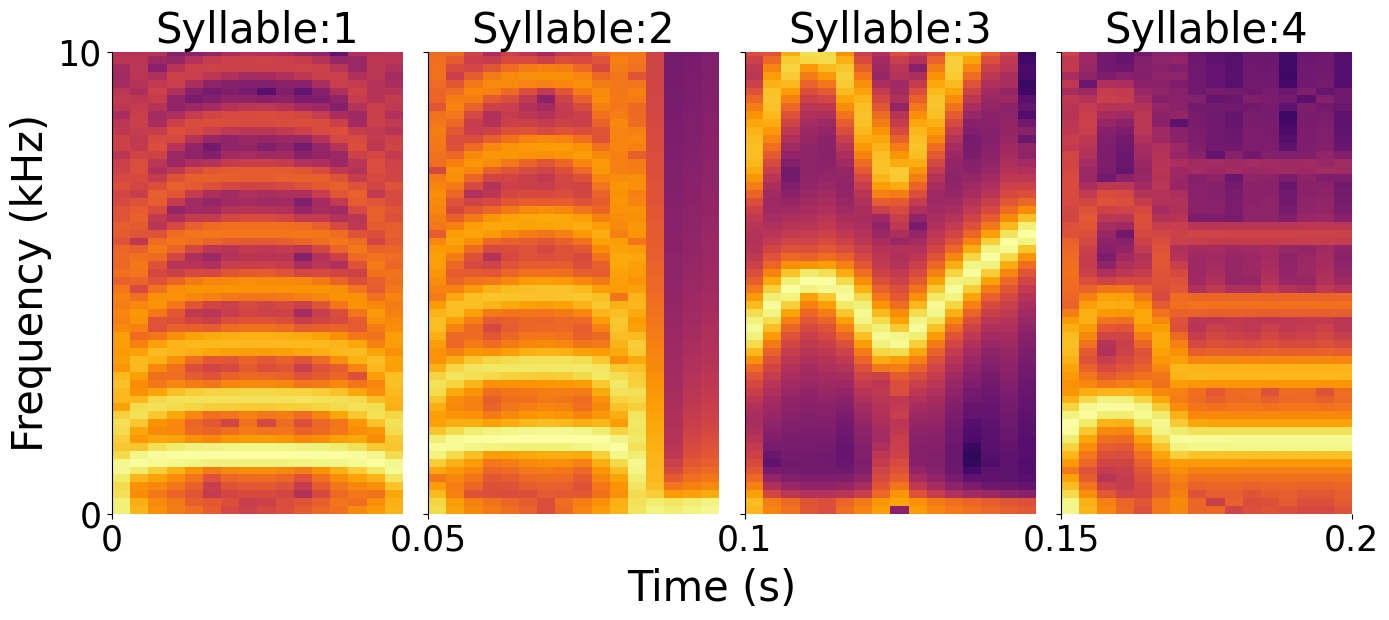

In [43]:
# Parameters for panel width and labeling step
seg = 0.05  # each subplot spans 0.05 s

figure, axes = plt.subplots(
    1, len(syllable_array),
    figsize=(4*len(syllable_array), 6),
    sharey=True, sharex=False,                 # sharey, but NOT sharex
    gridspec_kw={'wspace': 0.09}               # tight horizontal spacing
)

# Ensure axes is always a list, even for single subplot
if len(syllable_array) == 1:
    axes = [axes]

# Store spectrograms for each syllable
spectrograms = []

def fmt_tick(x):
    s = f"{x:.2f}".rstrip('0').rstrip('.')
    return s

for i, syllable in enumerate(syllable_array):
    # time window this panel represents in the global timeline
    x0 = i * seg
    x1 = (i + 1) * seg

    # pick the right pressure trace for this syllable
    P_src = P_t_list[i]  # assumes you appended in the simulation loop

    # Generate spectrogram positioned in the global time coordinates
    spectrumP, freqsP, t_bins, im = axes[i].specgram(
        P_src, Fs=1/dt, NFFT=256, noverlap=128,
        xextent=[x0, x1], cmap='inferno'
    )

    # Store spectrogram data
    spectrograms.append({
        "syllable": syllable,
        "spectrum": spectrumP,
        "freqs": freqsP,
        "time": t_bins,
        "image": im,
        "xrange": (x0, x1),
        "P_t": P_src
    })

    # Configure each subplot

    axes[i].set_title(f'Syllable:{syllable}', fontsize=30)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)
    axes[i].set_ylim(0, 10000)
    axes[i].set_xlim(x0, x1)
    # axes[i].set_yticklabels

    # ✅ Global-style ticks:
    # Only left edge ticks, except last panel shows both left+right
    if i < len(syllable_array) - 1:
        axes[i].set_xticks([x0])
        axes[i].set_xticklabels([fmt_tick(x0)])
    else:
        axes[i].set_xticks([x0, x1])
        axes[i].set_xticklabels([fmt_tick(x0), fmt_tick(x1)])

    # Y ticks
    axes[i].set_yticks([0, 10000])
    if i == 0:
        axes[i].set_yticklabels([0, 10])
    # else:
        # axes[i].set_yticklabels([])  # cleaner, contiguous look

    axes[i].tick_params(labelsize=25)
# # After the for loop ends (all syllables plotted) ...

# # Add one shared colorbar for the spectrograms
# cbar = figure.colorbar(
#     spectrograms[0]["image"],    # use the first specgram’s image handle
#     ax=axes,
#     orientation='vertical',
#     fraction=0.02,               # size of colorbar
#     pad=0.04                     # distance from plots
# )

# cbar.set_label("Power (dB)", fontsize=20)
# cbar.ax.tick_params(labelsize=15)

# Set labels only on the leftmost subplot
axes[0].set_ylabel('Frequency (kHz)', fontsize=30)
figure.supxlabel('Time (s)', fontsize=30, y = -0.05)
# plt.tight_layout()
# figure.subplots_adjust(wspace=0.1)  # extra-tight spacing between panels
plt.show()


In [11]:
# figure, ax = plt.subplots(2, sharex=True)

# time_x = np.linspace(0, duration, nt)
# ax[0].plot(time_x, Pressure(time_x), color='black')

# time_x = np.linspace(0, duration, nt)
# ax[1].plot(time_x, Tension(time_x), color='black')

# ax[0].set_ylabel('Pressure', fontsize=30)
# ax[0].spines['top'].set_visible(False)
# ax[0].spines['right'].set_visible(False)
# ax[0].spines['bottom'].set_visible(False)
# # ax[0].set_ylim(0.06,.10)
# ax[0].set_xlim(0,.05)
# ax[0].set_xticks([])
# # ax[0].set_yticks([.06,.10])
# ax[0].tick_params(labelsize=25)
# ax[0].yaxis.set_label_coords(-0.275,.5)

# ax[1].set_ylabel('Tension', fontsize=30)
# ax[1].set_xlabel('Time (s)', fontsize=30)
# ax[1].spines['top'].set_visible(False)
# ax[1].spines['right'].set_visible(False)
# # ax[1].set_ylim(0,.4)
# ax[0].set_xlim(0,.05)
# ax[0].set_xticks([0, .05])
# # ax[1].set_yticks([0,.4])
# ax[1].tick_params(labelsize=25, pad=10)
# ax[1].yaxis.set_label_coords(-0.26,.5)

# figure.set_size_inches(4, 6, forward=True)

# plt.plot()

Propogating these tension and pressure waves through the syrinx using the model (ODE).


In [12]:
# Plots

### Plots to quickly visualise each part of the process

In [13]:
# plt.plot(time_x, Pressure(time_x), color='black')
# plt.ylabel('Pressure input')
# plt.xlabel('Time (s)')

In [14]:
# plt.plot(time_x, Tension(time_x), color='black')
# plt.ylabel('Tension input')
# plt.xlabel('Time (s)')

In [15]:
# # Labial position (X)

# plt.plot(time_x, X, color='black')
# plt.ylabel('Labial position X(t)')
# plt.xlabel('Time (s)')

In [16]:
# # Labial velocity (Y)

# plt.plot(time_x, Y, color='black')
# plt.ylabel('Labial velocity Y(t)')
# plt.xlabel('Time (s)')

In [17]:
# plt.plot(time_x, song, color='black')
# plt.ylabel('Syrinx output')
# plt.xlabel('Time (s)')

In [18]:
# plt.plot(time_x, P_t, color='black')
# plt.ylabel('Trachea output (Pressure $P_{in}$)')
# plt.xlabel('Time (s)')
# plt.show()

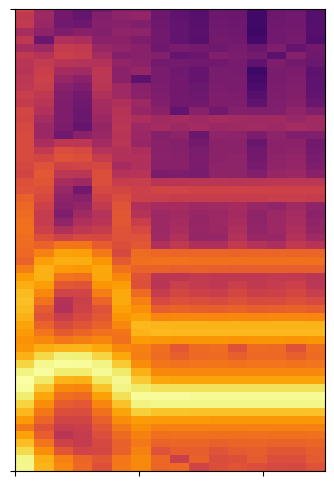

In [19]:
figure, ax = plt.subplots(1)

(spectrumP, freqsP, t, im) = plt.specgram(P_t, Fs=1/dt, NFFT=256, noverlap=128, xextent=[0,.05], cmap='inferno')
im


# ax.set_ylabel('Frequency (kHz)', fontsize=30)
# ax.set_xlabel('Time (s)', fontsize=30)
# ax.set_title(f'Syllable:{syllable}', fontsize=30)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.set_ylim(0,10000)
ax.set_xlim(0,.05)
ax.set_xticklabels([])
ax.set_yticks([0, 10000])
# ax.set_yticklabels([0, 10])
ax.set_yticklabels([])
ax.tick_params(labelsize=15)

figure.set_size_inches(4, 6, forward=True)


plt.plot()
plt.show()

Text(0.5, 0, 'Frequency')

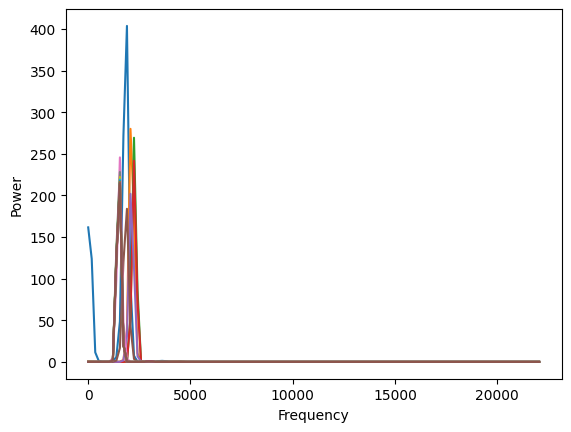

In [20]:
plt.plot(freqsP, spectrumP)
plt.ylabel('Power')
plt.xlabel('Frequency')

/home/asuryawanshi/miniforge3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/asuryawanshi/miniforge3/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


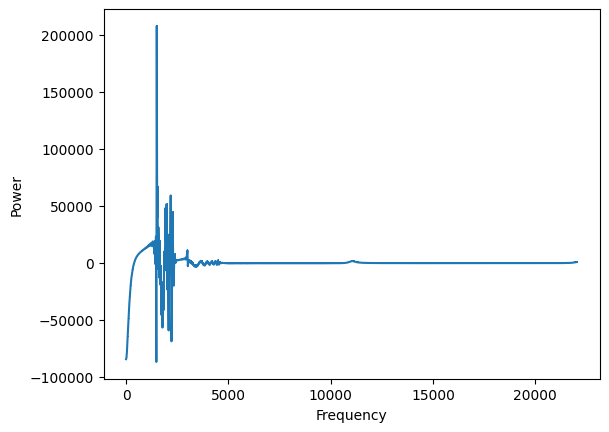

In [21]:
sp = np.fft.rfft(P_t)
freqs_sp = np.arange(sp.size) / (dt * nt)
plt.plot(freqs_sp, sp, marker=',')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

### Ignore here onwards

In [22]:
# def Tension(t):
#     """
#         Tension1 = 0.1*np.sin(sin_t*np.pi*40) + 0.6
#         Tension2 = 0.2*np.sin(sin_t*np.pi*15) + 0.6
#         Tension = np.concatenate((Tension1[:int(np.ceil(nt/2))], Tension2[:int(nt-nt/2)]))
#     """
#     if isinstance(t, float):
#         if t <= duration/2: return 0.1*np.sin(t*np.pi*40) + 0.6
#         else: return 0.2*np.sin((t-duration/2)*np.pi*15) + 0.6
#     elif isinstance(t, np.ndarray):
#         Tension1 = 0.1*np.sin(t*np.pi*40) + 0.6
#         Tension2 = 0.2*np.sin(t*np.pi*15) + 0.6
#         return np.concatenate((Tension1[:int(np.ceil(t.size/2))], Tension2[:int(t.size-t.size/2)]))
    
# def Pressure(t):
#     """ Pressure = 0.01*np.sin(sin_t*np.pi*2*100) + 0.02 """
#     return 0.01*np.sin(t*np.pi*2*100) + 0.02

In [23]:
# def Tension(t):
#     """ Tension = 0.6 * np.ones((nt)) """
#     return np.ones((np.asarray(t).shape)) * 0.6
    
# def Pressure(t):
#     """ Pressure = 0.02 * np.ones((nt)) """
#     return np.ones((np.asarray(t).shape)) * 0.02

In [24]:
# def Tension(t):
#     """ Tension = 0.2 * np.ones((nt)) """
#     return np.ones((np.asarray(t).shape)) * 0.2
    
# def Pressure(t):
#     """ Pressure = 0.1 * np.ones((nt)) """
#     return np.ones((np.asarray(t).shape)) * 0.1

In [25]:
# def Tension(t):
#     """
#         Tension1 = 0.1*np.sin(sin_t*np.pi*40) + 0.6
#         Tension2 = 0.2*np.sin(sin_t*np.pi*15) + 0.6
#         Tension = np.concatenate((Tension1[:int(np.ceil(nt/2))], Tension2[:int(nt-nt/2)]))
#     """
#     if isinstance(t, float):
#         if t <= duration/2: return 0.1*np.sin(t*np.pi*40) + 0.6
#         else: return 0.2*np.sin((t-duration/2)*np.pi*15) + 0.6
#     elif isinstance(t, np.ndarray):
#         Tension1 = 0.1*np.sin(t*np.pi*40) + 0.6
#         Tension2 = 0.2*np.sin(t*np.pi*15) + 0.6
#         return np.concatenate((Tension1[:int(np.ceil(t.size/2))], Tension2[:int(t.size-t.size/2)]))
    
# def Pressure(t):
#     """ Pressure = 0.02 * np.ones((nt)) """
#     return np.ones((np.asarray(t).shape)) * 0.02

In [26]:
# def Tension(t):
#     """
#         Tension1 = 0.1*np.sin(sin_t*np.pi*40) + 0.2
#         Tension2 = 0.2*np.sin(sin_t*np.pi*15) + 0.2
#         Tension = np.concatenate((Tension1[:int(np.ceil(nt/2))], Tension2[:int(nt-nt/2)]))
#     """
#     if isinstance(t, float):
#         if t <= duration/2: return 0.1*np.sin(t*np.pi*40) + 0.2
#         else: return 0.2*np.sin((t-duration/2)*np.pi*15) + 0.2
#     elif isinstance(t, np.ndarray):
#         Tension1 = 0.1*np.sin(t*np.pi*40) + 0.2
#         Tension2 = 0.2*np.sin(t*np.pi*15) + 0.2
#         return np.concatenate((Tension1[:int(np.ceil(t.size/2))], Tension2[:int(t.size-t.size/2)]))
    
# def Pressure(t):
#     """ Pressure = 0.02 * np.ones((nt)) """
#     return np.ones((np.asarray(t).shape)) * 0.02

In [27]:
# def Tension(t):
#     """ Tension = np.linspace(0.2, 0.1, nt) """
#     return -2 * t + 0.2
    
# def Pressure(t):
#     """ Pressure = 0.1 * np.ones((nt)) """
#     return np.ones((np.asarray(t).shape)) * 0.1

In [28]:
# def Tension(t):
#     """ Tension = np.ones((nt)) * 0.1 """
#     return np.ones((np.asarray(t).shape)) * 0.1
    
# def Pressure(t):
#     """
#         Pressure = 0.02*np.sin(sin_t*np.pi*10) + 0.08
#         where sin_t = np.linspace(duration/2, duration*(3/2), nt)
#     """
#     return 0.02*np.sin((duration/2 + t)*np.pi*10) + 0.08

In [29]:
# def Tension(t):
#     """
#         Tension1 = 0.15*np.sin(sin_t*np.pi*40) + 0.6
#         Tension2 = 0.4*np.sin(sin_t*np.pi*15) + 0.6
#         Tension = np.concatenate((Tension1[:int(np.ceil(nt/2))], Tension2[:int(nt-nt/2)]))
#     """
#     if isinstance(t, float):
#         if t <= duration/2: return 0.15*np.sin(t*np.pi*40) + 0.6
#         else: return 0.2*np.sin((t-duration/2)*np.pi*15) + 0.6
#     elif isinstance(t, np.ndarray):
#         Tension1 = 0.15*np.sin(t*np.pi*40) + 0.6
#         Tension2 = 0.4*np.sin(t*np.pi*15) + 0.6
#         return np.concatenate((Tension1[:int(np.ceil(t.size/2))], Tension2[:int(t.size-t.size/2)]))
    
# def Pressure(t):
#     """ Pressure = 0.16 * np.ones((nt)) """
#     return np.ones((np.asarray(t).shape)) * 0.16

In [30]:
# def Tension(t):
#     """ Tension = np.linspace(0.2, 0, nt) """
#     return -4 * t + 0.2
    
# def Pressure(t):
#     """
#         Pressure = 0.02*np.sin(sin_t*np.pi*10) + 0.14
#         where sin_t = np.linspace(duration/2, duration*(3/2), nt)
#     """
#     return 0.02*np.sin((duration/2 + t)*np.pi*10) + 0.14

In [31]:
# def Tension(t):
#     """ Tension = 0.6 * np.ones((nt)) """
#     return np.ones((np.asarray(t).shape)) * 0.6
    
# def Pressure(t):
#     """ Pressure = 0.1 * np.ones((nt)) """
#     return np.ones((np.asarray(t).shape)) * 0.1

In [32]:
# def Tension(t):
#     """ Tension = 0.6 * np.ones((nt)) """
#     return np.ones((np.asarray(t).shape)) * 0.1
    
# def Pressure(t):
#     """ Pressure = 0.1 * np.ones((nt)) """
#     return 2*np.exp(50**-(t*20))/10 + 0.1

In [33]:
# def Tension(t):
#     """ Tension = 0.6 * np.ones((nt)) """
    
#     return np.ones((np.asarray(t).shape)) * 0.1
    
    
# def Pressure(t):
#     """
#         Pressure1 = 0.05*np.sin(t*np.pi*40) + 0.1
#         Pressure2 = 0.0525*sigmoid(-(t-0.01)*300)+0.1
#         Pressure = np.concatenate((Pressure1[:int(np.ceil(t.size/4))], Pressure2[:int(t.size-t.size/4)]))
#     """
#     if isinstance(t, float):
#         if t <= duration/2: return 0.05*np.sin(t*np.pi*40) + 0.1
#         else: return 0.0525*sigmoid(-((t-duration/4)-0.01)*300)+0.1
#     elif isinstance(t, np.ndarray):
#         Pressure1 = 0.08*np.sin(t*np.pi*40) + 0.04
#         Pressure2 = 0.084*sigmoid(-(t-0.01)*300)+0.04
#         return np.concatenate((Pressure1[:int(np.ceil(t.size/4))], Pressure2[:int(t.size-t.size/4)]))

In [34]:
# def Tension(t):
#     """ Tension = 0.6 * np.ones((nt)) """
    
#     if isinstance(t, float):
#         if t <= duration/3: return 0.2*np.sin(t*np.pi*60) + 0.2
#         else: return -4 * (t-duration/3) + 0.2
#     elif isinstance(t, np.ndarray):
#         Pressure1 = 0.2*np.sin(t*np.pi*60) + 0.2
#         Pressure2 = -4 * t + 0.2
        
#         return np.concatenate((Pressure1[:int(np.ceil(t.size/3))], Pressure2[:int(t.size-t.size/3)]))
    
    
# def Pressure(t):
#     return 0.02*np.sin(t*np.pi*20) + 0.002*np.sin(t*np.pi*200) + 0.06

In [35]:
# def Tension(t):
#     """ Generalised exponential waveform """
#     return   (1.2 * np.exp(-80*t) - np.exp(-300*t)) + 0.3
    
# def Pressure(t):
#     """ Constant """
# #     return np.ones((np.asarray(t).shape)) * 0.02
#     return 0.04*np.sin((duration/2 + t)*np.pi*10) + 0.05

In [36]:
# RC1
# Initial reward contour
# def Tension(t):
#     """ Tension = T_beta * np.ones((nt)) """
    
#     return np.ones((np.asarray(t).shape)) * 0.6
    
# def Pressure(t):
#     """ Pressure = P_alpha * np.ones((nt)) """
    
#     return np.ones((np.asarray(t).shape)) * 0.2